<a href="https://colab.research.google.com/github/Kovarthanan07/INM706_Coursework/blob/main/HeartBeat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

normal_path = "/content/drive/MyDrive/Heartbeat/ptbdb_normal.csv"
abnormal_path = "/content/drive/MyDrive/Heartbeat/ptbdb_abnormal.csv"

In [3]:


normal_df = pd.read_csv(normal_path, header=None)
abnormal_df = pd.read_csv(abnormal_path, header=None)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


In [5]:
normal_df['label'] = 0  # 0 for normal
abnormal_df['label'] = 1  # 1 for abnormal


Combining for EDA

In [6]:
df = pd.concat([normal_df, abnormal_df], ignore_index=True)


In [7]:
print(df.shape)
print(df.label.value_counts())

df.describe()


(14552, 189)
label
1    10506
0     4046
Name: count, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,label
count,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,...,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.0,14552.000000,14552.000000
mean,0.976637,0.721663,0.403099,0.242893,0.207218,0.216453,0.221752,0.224486,0.227349,0.229704,...,0.001133,0.000900,0.000739,0.000661,0.000475,0.000177,0.000185,0.0,0.721963,0.721963
std,0.034532,0.195690,0.249794,0.249519,0.218097,0.192412,0.180740,0.176943,0.176674,0.176579,...,0.021012,0.017316,0.014640,0.014033,0.012289,0.006545,0.006835,0.0,0.448047,0.448047
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.959377,0.584589,0.212300,0.052269,0.061875,0.090487,0.096503,0.097095,0.097231,0.097144,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,0.740148,0.371911,0.168148,0.136082,0.159451,0.167479,0.171541,0.177380,0.180337,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000
75%,1.000000,0.881483,0.557785,0.336232,0.264104,0.264633,0.286484,0.302255,0.311664,0.325292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.773743,0.789804,0.628177,0.602033,0.644880,0.371502,0.376668,0.0,1.000000,1.000000


visualizing class balance

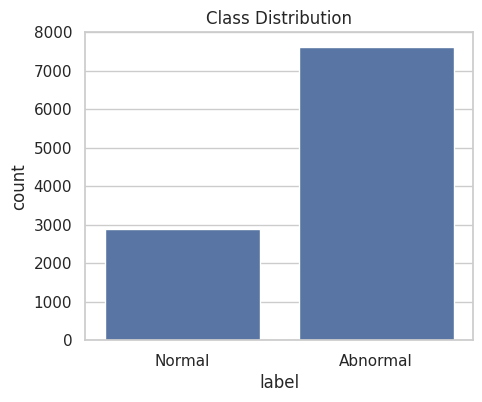

In [8]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='label')
plt.title('Class Distribution')
plt.xticks([0, 1], ['Normal', 'Abnormal'])
plt.show()


plotting 3 normal and 3 abnormal ECGS

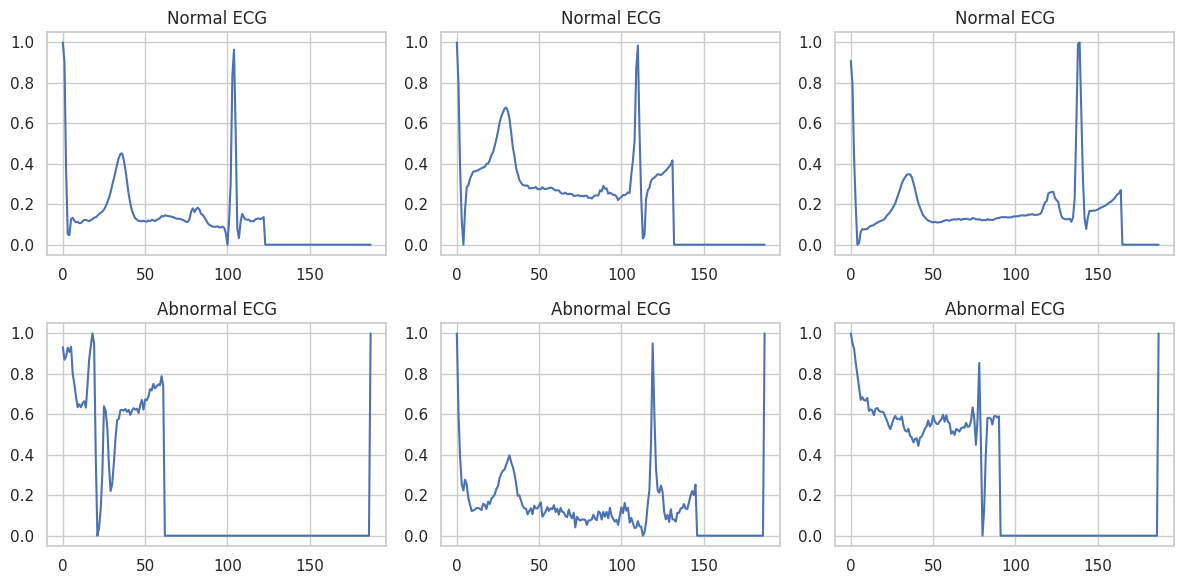

In [9]:
# Plot 3 normal and 3 abnormal ECGs
plt.figure(figsize=(12, 6))
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.plot(normal_df.iloc[i, :-1])
    plt.title("Normal ECG")

for i in range(3):
    plt.subplot(2, 3, i+4)
    plt.plot(abnormal_df.iloc[i, :-1])
    plt.title("Abnormal ECG")

plt.tight_layout()
plt.show()


signal value comparison

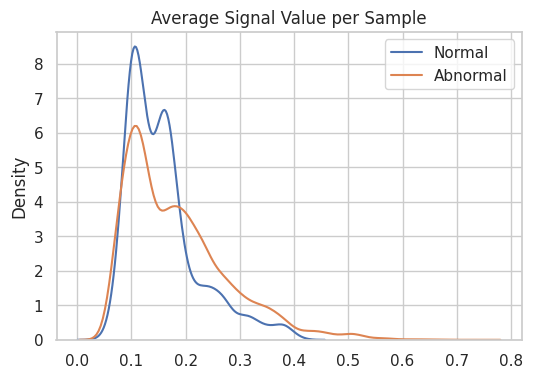

In [10]:
normal_stats = normal_df.iloc[:, :-1].mean(axis=1)
abnormal_stats = abnormal_df.iloc[:, :-1].mean(axis=1)

plt.figure(figsize=(6,4))
sns.kdeplot(normal_stats, label='Normal')
sns.kdeplot(abnormal_stats, label='Abnormal')
plt.title('Average Signal Value per Sample')
plt.legend()
plt.show()


checking for missinf or unsual values

In [11]:
print("Missing values:", df.isnull().sum().sum())
print("Any NaNs?", df.isna().any().any())


Missing values: 0
Any NaNs? False


correlation heatmap

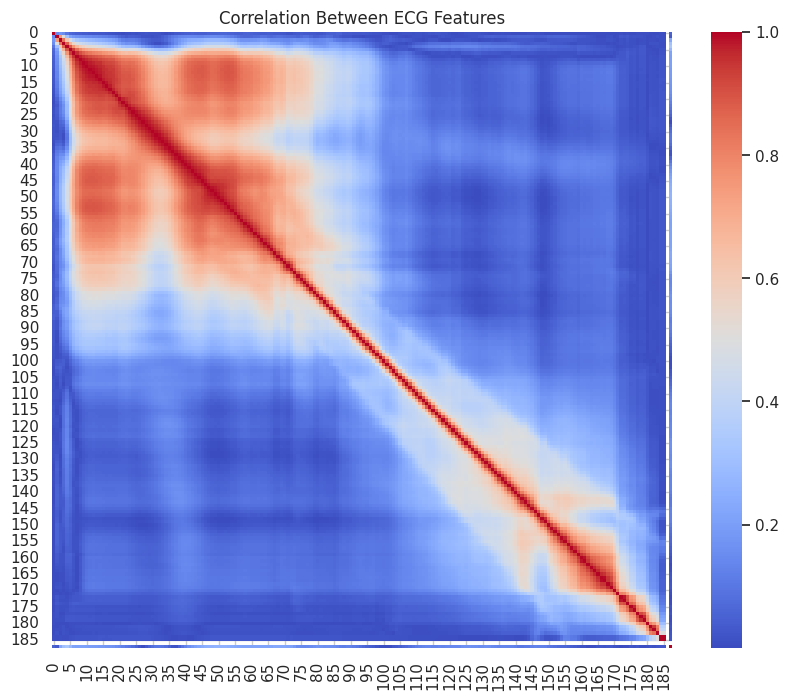

In [12]:
corr = df.iloc[:, :-1].corr().abs()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', cbar=True)
plt.title("Correlation Between ECG Features")
plt.show()


Making sure all signals are the same length. If not, you'll need padding or trimming.

In [13]:
print("Signal length (features):", normal_df.shape[1] - 1)


Signal length (features): 188


multiple ECGs from both normal and abnormal sets to see the variation.


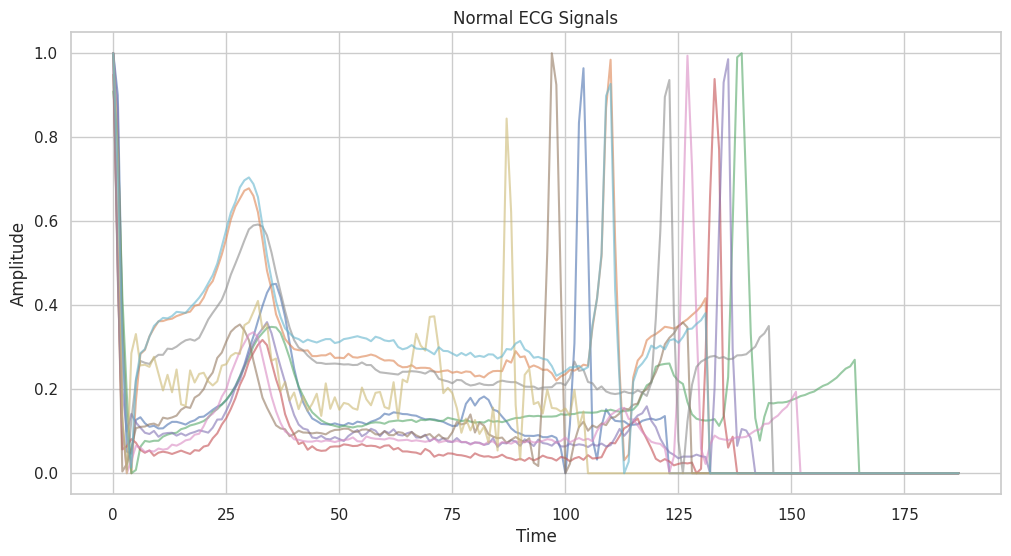

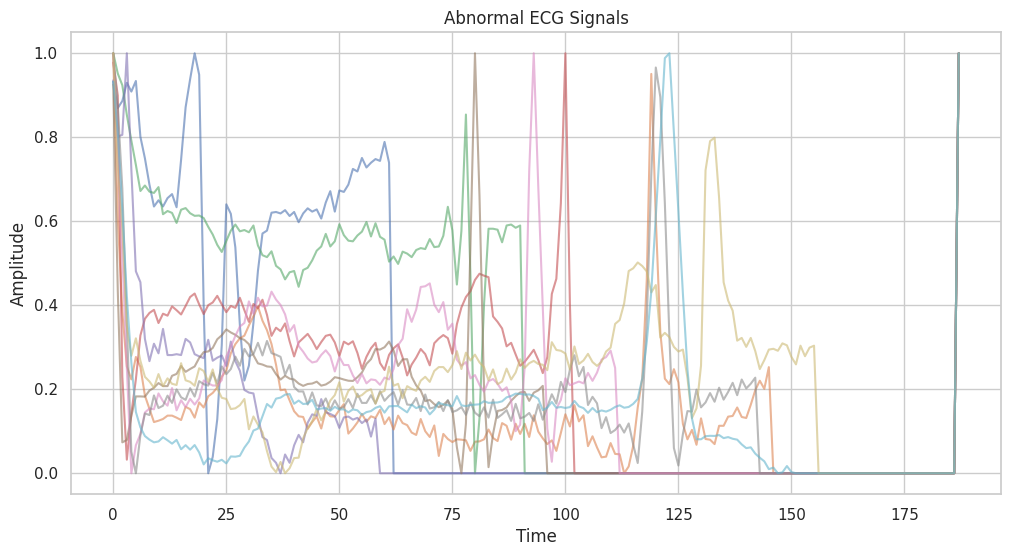

In [14]:
def plot_multiple_signals(df, label, title, n=10):
    plt.figure(figsize=(12, 6))
    for i in range(n):
        plt.plot(df.iloc[i, :-1], label=f"{label} {i+1}", alpha=0.6)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

plot_multiple_signals(normal_df, 'Normal', 'Normal ECG Signals')
plot_multiple_signals(abnormal_df, 'Abnormal', 'Abnormal ECG Signals')


Energy = how "intense" the signal is (sum of squares).

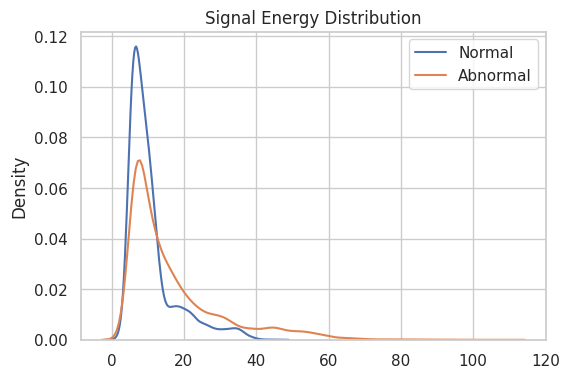

In [15]:
normal_energy = (normal_df.iloc[:, :-1]**2).sum(axis=1)
abnormal_energy = (abnormal_df.iloc[:, :-1]**2).sum(axis=1)

plt.figure(figsize=(6, 4))
sns.kdeplot(normal_energy, label='Normal')
sns.kdeplot(abnormal_energy, label='Abnormal')
plt.title("Signal Energy Distribution")
plt.legend()
plt.show()


signal variability (Standard Deviation)

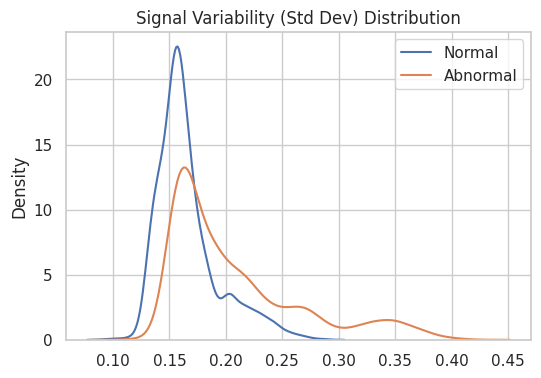

In [16]:
normal_std = normal_df.iloc[:, :-1].std(axis=1)
abnormal_std = abnormal_df.iloc[:, :-1].std(axis=1)

plt.figure(figsize=(6, 4))
sns.kdeplot(normal_std, label='Normal')
sns.kdeplot(abnormal_std, label='Abnormal')
plt.title("Signal Variability (Std Dev) Distribution")
plt.legend()
plt.show()


PCA - to see if normal and abnormal heartbeats separate in lower dimensions:


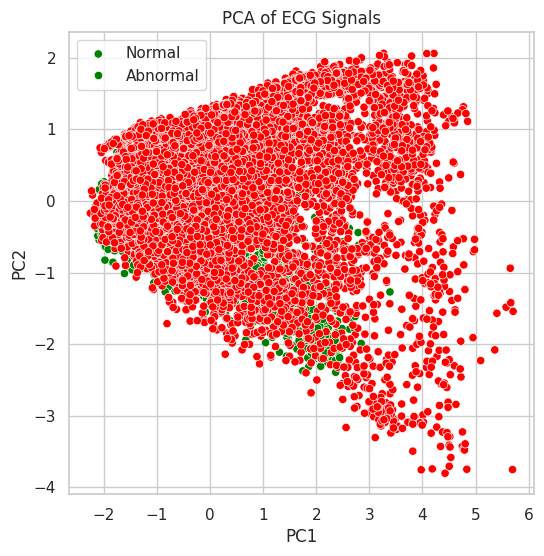

In [17]:
from sklearn.decomposition import PCA

X = df.iloc[:, :-1]
y = df['label']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=['green', 'red'])
plt.title('PCA of ECG Signals')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(labels=['Normal', 'Abnormal'])
plt.show()


Checking specific parts of the signal (like index 50, 100, etc.) to see which parts differ the most

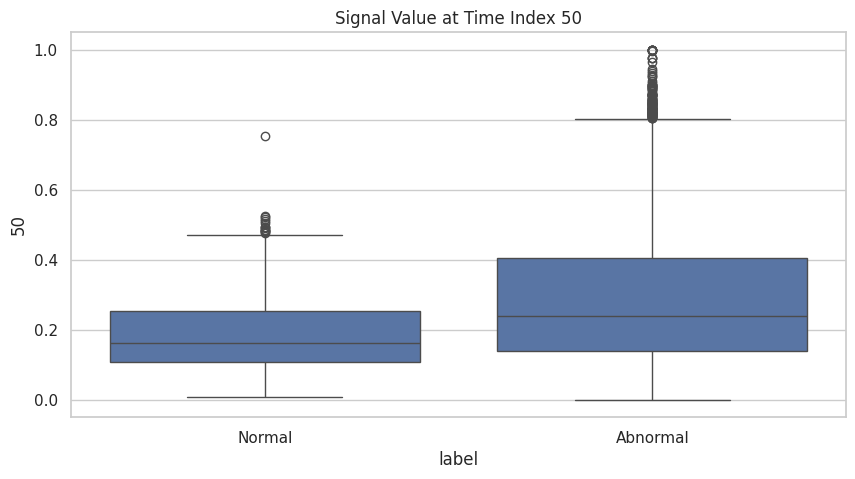

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y=df[50], data=df)
plt.title('Signal Value at Time Index 50')
plt.xticks([0, 1], ['Normal', 'Abnormal'])
plt.show()


Entropy = How "chaotic" a signal is. More chaos = possible anomaly.

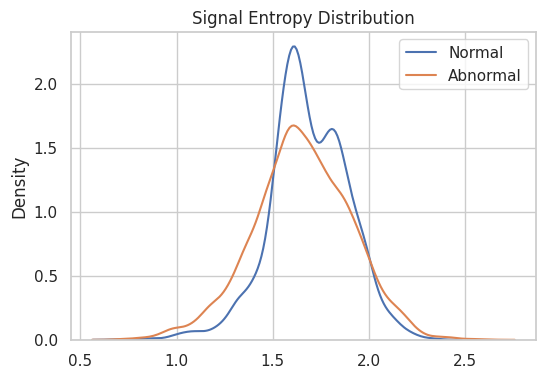

In [19]:
from scipy.stats import entropy

normal_entropy = normal_df.iloc[:, :-1].apply(lambda x: entropy(np.histogram(x, bins=20)[0]), axis=1)
abnormal_entropy = abnormal_df.iloc[:, :-1].apply(lambda x: entropy(np.histogram(x, bins=20)[0]), axis=1)

plt.figure(figsize=(6,4))
sns.kdeplot(normal_entropy, label='Normal')
sns.kdeplot(abnormal_entropy, label='Abnormal')
plt.title("Signal Entropy Distribution")
plt.legend()
plt.show()


Using a quick RandomForestClassifier to see which parts of the signal are most important.

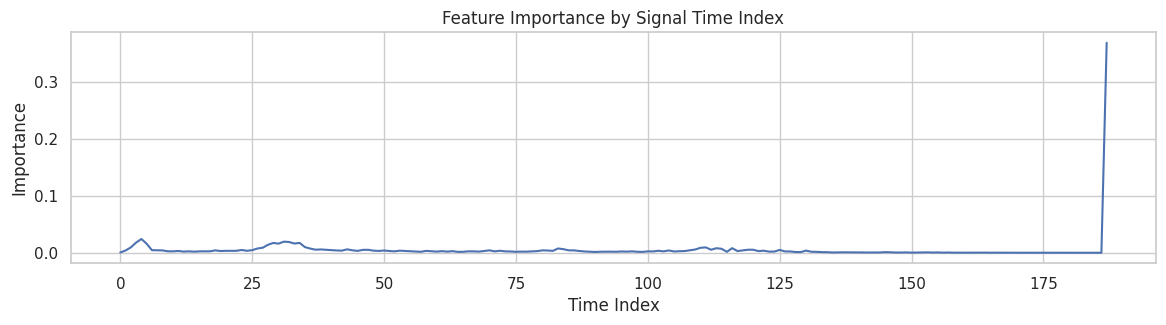

In [20]:
from sklearn.ensemble import RandomForestClassifier

X = df.iloc[:, :-1]
y = df['label']

model = RandomForestClassifier()
model.fit(X, y)

importance = model.feature_importances_

plt.figure(figsize=(14, 3))
plt.plot(importance)
plt.title("Feature Importance by Signal Time Index")
plt.xlabel("Time Index")
plt.ylabel("Importance")
plt.show()
